In [24]:
import numpy as np
#R: np.array (num_states, num_actions)
#rows correspond to states, columns correspond to actions
#R(s1,a1) = 1, R(s1,a2) = 2, R(s2,a1) = 3, R(s2,a2) = 4
R = np.array([[1,2],[3,4]])
for row in R:
    print(" ".join(f"{val:3}" for val in row))


  1   2
  3   4


In [25]:
#T: np.array (num_states, num_actions, num_states)
#T[s,a,s′]=P(s′∣s,a)
T = np.array([
            [[0.5, 0.5], 
             [0.8, 0.2]],
            [[0.2, 0.8], 
             [0.3, 0.7]]
        ])


In [26]:
V = np.array([10,20])
gamma = 0.99

Computing the Bellman backup equation
v(s1) = max(Q(s1,a1), Q(s1,a2))
v(s1) = max(Q(s2,a1), Q(s2,a2))

Q(s1,a1) = R(s1,a1) + gamma * p(s1,a1,s1) * v(s1)  + gamma * p(s1,a1,s2) * V(s2) 

![alt text](<bellman equation 1.JPG>)

Reward <bold>function is usually r(s) or r(s,a) or even r(s,a,s'). In the above example it is r(s,a). The immediate reward R when taken action a from state s. R = 3 is the immediate reward for taking action a1 from state s2.
p = transitional matrix (T (s,a,s'))

![alt text](<Q calculation.JPG>)

In [20]:
Q = np.zeros((2,2))
print(Q)
Q = R + gamma * np.sum(T * V, axis=2)
print(Q)

V = np.max(Q, axis=1)
print(V)

[[0. 0.]
 [0. 0.]]
[[15.85 13.88]
 [20.82 20.83]]
[15.85 20.83]


Rule of matrix multiplication

If you multiply a matrix of shape:
( 𝐴 × 𝐵 )
with a matrix of shape 
( 𝐵 × 𝐶)

you get a new matrix of shape:
( 𝐴 × 𝐶 )

👉 The inner dimensions (B) must match. The result has the outer dimensions.

# POLICY

policy: np.array (num_states)
R: np.array (num_states, num_actions)
T: np.array (num_states, num_actions, num_states)
gamma: float
tol: float

![alt text](<policy reward.JPG>) 

![alt text](<policy transition.JPG>) 

![alt text](<policy evaluation - 1.JPG>) 

![alt text](<policy evaluation - 2.JPG>)


In [102]:
#Base Test - Setup
R = np.array([[1, 2], [3, 4]])
T = np.array([
            [[0.5, 0.5], [0.8, 0.2]],
            [[0.2, 0.8], [0.3, 0.7]]
        ])

In [103]:
#1b-0-basic: Policy evaluation expected type and shape
#Deterministic policy
policy = np.array([0, 1])
gamma = 0
V = np.zeros(2)

In [107]:
#Demo np.sum
a = np.array([[0.3,0.7],[0.4,0.6]])
b = np.array([[10,20],[30,40]])
print(a * b)
c = np.sum(a * b, axis=0)
d = np.sum(a * b, axis=1)
print(c)
print(d)

[[ 3. 14.]
 [12. 24.]]
[15. 38.]
[17. 36.]


![alt text](lecture_policy_evaluation_Bellman.JPG)

In [105]:
print("policy:", policy)
print("T:", T)
print("R:",R)

tol = 1e-3
diff = np.inf
while(diff > tol):
    Q = R + gamma * np.sum(T * V, axis=2)
    print("Q:", Q)
    if policy.ndim == 1:
        policy_one_hot = np.zeros_like(Q)
        policy_one_hot[np.arange(Q.shape[0]), policy] = 1
        policy = policy_one_hot
        print("policy one hot:", policy)
    V_new = np.sum(policy * Q, axis=1)
    diff = np.max(np.abs(V_new - V))
    V = V_new
print("V new:", V)

policy: [0 1]
T: [[[0.5 0.5]
  [0.8 0.2]]

 [[0.2 0.8]
  [0.3 0.7]]]
R: [[1 2]
 [3 4]]
Q: [[1. 2.]
 [3. 4.]]
policy one hot: [[1. 0.]
 [0. 1.]]
Q: [[1. 2.]
 [3. 4.]]
V new: [1. 4.]


#POLICY ITERATION - POLICY IMPROVEMENT
![Policy Improvement - 1.JPG](<attachment:Policy Improvement - 1.JPG>)

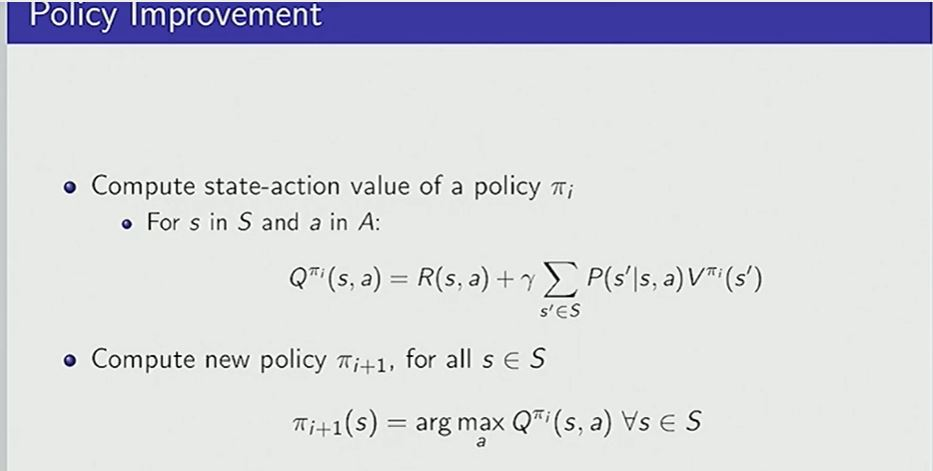

This is quite simple. Find the Q using bellman backup equation. Then choose the policy with argmax of Q (which means whichever policy had a bigger value take it.). Like the Q array of [[19,18] [9,23]]

![policy improvement - argmax.JPG](<attachment:policy improvement - argmax.JPG>)
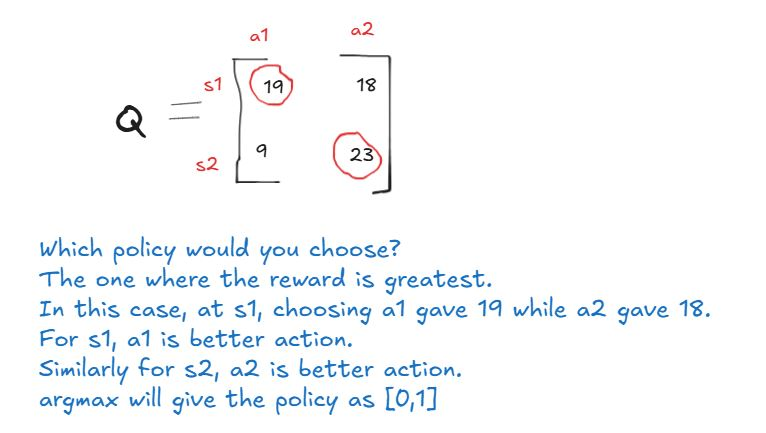

In [3]:
import numpy as np
R = np.array([[10, 0], [0, 5]])
T = np.array([[[1, 0], [0, 1]],
              [[1, 0], [0, 1]]])
V_policy = np.array([10, 20])
gamma = 0.9

Q = R + gamma * np.sum(T * V_policy, axis=2)
print("Q:", Q)

V_policy_new = np.argmax(Q, axis=1)    
print("V policy new:", V_policy_new)

Q: [[19. 18.]
 [ 9. 23.]]
V policy new: [0 1]
